## Loading data set

In [1]:
import os

from pathlib import Path
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [2]:
# Define the path to the training data
train_dir_fresh = Path('/home/santanu/code/VMontejo/lunar-crater-age-classifier/raw_data/train/ejecta')
train_dir_none = Path('/home/santanu/code/VMontejo/lunar-crater-age-classifier/raw_data/train/none')
train_dir_old = Path('/home/santanu/code/VMontejo/lunar-crater-age-classifier/raw_data/train/oldcrater')

In [3]:
# Inspect Image Shapes
shapes = []

for img_name in os.listdir(train_dir_fresh):
    img_path = train_dir_fresh / img_name
    if img_path.suffix.lower() in ['.jpg']:
        img = Image.open(img_path)
        shapes.append((img.height, img.width, len(img.getbands())))

unique_shapes = set(shapes)
print("Unique shapes:", unique_shapes)

Unique shapes: {(227, 227, 3)}


In [4]:
image_files_ejecta = list(train_dir_fresh.glob('*.jpg'))
image_files_none = list(train_dir_none.glob('*.jpg'))
image_files_old = list(train_dir_old.glob('*.jpg'))

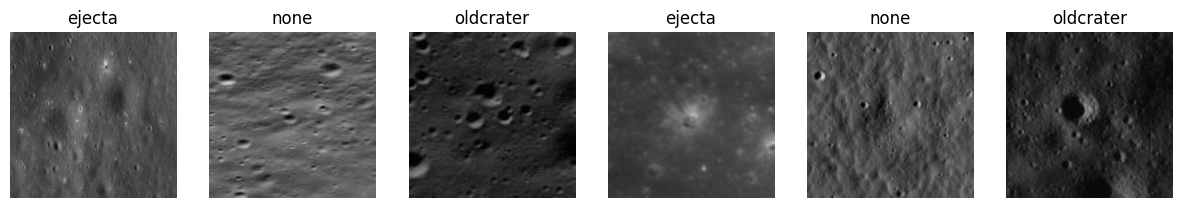

In [5]:
# plotting subplot in three different datasets
image_files = [image_files_ejecta[0],
               image_files_none[0],
               image_files_old[0],
               image_files_ejecta[1],
               image_files_none[1],
               image_files_old[1]]
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = Image.open(image_files[i])
    plt.imshow(img)
    plt.title(image_files[i].parent.name)
    plt.axis('off')

In [6]:
# Check Pixel Value Range
pixels = []

for img_name in os.listdir(train_dir_fresh):
    img_path = train_dir_fresh / img_name
    if img_path.suffix.lower() in ['.jpg']:
        img = np.array(Image.open(img_path))
        pixels.append(img.mean())

print("Global min pixel:", np.min(pixels))
print("Global max pixel:", np.max(pixels))
print("Global average pixel:", np.mean(pixels))

Global min pixel: 26.15080828271459
Global max pixel: 192.09225872809486
Global average pixel: 80.55909212483375


In [8]:
# compute data set mean and std
all_pixels = []

for img_name in os.listdir(train_dir_fresh):
    img_path = train_dir_fresh / img_name
    if img_path.suffix.lower() in ['.jpg']:
        img = np.array(Image.open(img_path).convert('L'))
        all_pixels.append(img.flatten())
    all_pixels.append(img.flatten())

all_pixels = np.concatenate(all_pixels)

mean = np.mean(all_pixels)
std = np.std(all_pixels)

print("Dataset Mean:", mean)
print("Dataset Std:", std)

Dataset Mean: 80.03991635777912
Dataset Std: 36.28356990008863


In [10]:
img = (img-mean)/std
img

array([[-2.19535087, -2.19535087, -2.19459128, ..., -2.1581309 ,
        -2.15889049, -2.15889049],
       [-2.19535087, -2.19535087, -2.19459128, ..., -2.15889049,
        -2.15965008, -2.15965008],
       [-2.19611047, -2.19611047, -2.19459128, ..., -2.15889049,
        -2.15965008, -2.16116927],
       ...,
       [-2.2021872 , -2.2021872 , -2.2021872 , ..., -2.16344804,
        -2.15889049, -2.15661172],
       [-2.2021872 , -2.2021872 , -2.2021872 , ..., -2.16496722,
        -2.16040967, -2.1581309 ],
       [-2.2014276 , -2.2014276 , -2.2021872 , ..., -2.167246  ,
        -2.16192886, -2.15889049]], shape=(227, 227))

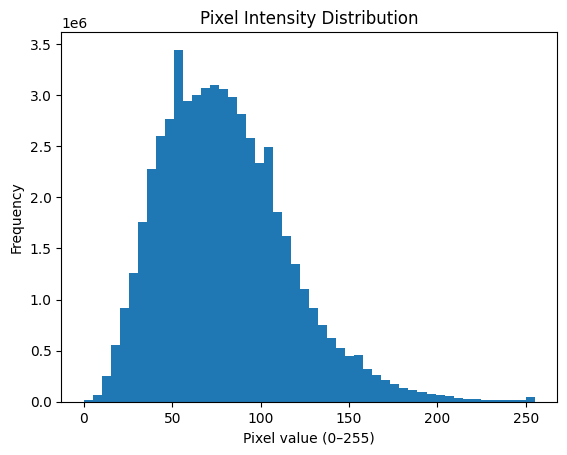

In [ ]:
#Plot Pixel Histograms
plt.hist(all_pixels, bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel value (0–255)")
plt.ylabel("Frequency")
plt.show()